### AUTOR: Felipe Sembay

<b> Conhecendo melhor nossa base de consumidores:</b> qual estado possui os clientes com melhores pontuações de crédito?

    
### Objetivo
Queremos conhecer melhor nossos clientes por estado. Para isso, iniciamos uma análise na pontuação de crédito. Para realizar a verificação inicial, precisamos de alguns valores. Os valores são a média, a mediana, a moda e o desvio padrão da pontuação de crédito.

Tópicos
Neste desafio você aprenderá:

- Média;
- Mediana;
- Moda;
- Desvio padrão.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid') 

In [3]:
df = pd.read_csv('desafio1.csv', sep=',')
df.head()

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
0,1,e7f44fcbd380d4cef7e6c232cc7e37895c3fd197,6d6e0aa1b9b413e442e2fb68df14b4fc3f91de50,619,SC,F,42,2,0.00,1,1,1
1,2,28dcb083ad90512da16b9430085c2cddb8ca5e12,48e1ad846796fa314f1b4a6702b83343eb5482c5,608,RS,F,41,1,83807.86,1,0,1
2,3,774bc378f787438c9c7594e536787d07a097a54b,f2b29d5d934de615812b697132e767dea0f1e9e2,502,SC,F,42,8,159660.80,3,1,0
3,4,043a71326f7096de155e7f0c559dc62b5e4b7239,85d5c9da7cddd8109ad32a6c348fe2bb10bf99f2,699,SC,F,39,1,0.00,2,0,0
4,5,37b3bb8ca243955fb3605ec7e1c2a4607cdb3b22,ddc89c837a6933639de75f28171057060bd322df,850,RS,F,43,2,125510.82,1,1,1


A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset.

In [12]:
print('Este DataFrame possui {} linhas e {} colunas.'.format(df.shape[0], df.shape[1]))

Este DataFrame possui 7000 linhas e 12 colunas.


In [4]:
df.describe()

,RowNumber,pontuacao_credito,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,3500.500000,649.787000,38.892714,5.010286,76471.883751,1.526000,0.703286,0.512143
std,2020.870275,97.046279,10.465562,2.887500,62403.383911,0.583047,0.456842,0.499888
min,1.000000,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1750.750000,582.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000
50%,3500.500000,651.000000,37.000000,5.000000,97277.130000,1.000000,1.000000,1.000000
75%,5250.250000,717.000000,44.000000,7.250000,127537.155000,2.000000,1.000000,1.000000
max,7000.000000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [13]:
df.isnull().sum()

RowNumber                   0
id                          0
sobrenome                   0
pontuacao_credito           0
estado_residencia           0
genero                      0
idade                       0
nivel_estabilidade          0
saldo_conta                 0
numero_produtos             0
possui_cartao_de_credito    0
membro_ativo                0
dtype: int64

- Avaliando os dados com o método describe, a pontuação de crédito aparentemente não apresenta outliers. 
- Na variável idade, podemos ter outliers visto que a diferença da média, mediana e 3° quartil comparado ao 4° quartil foi bem elevada. Mas não é impossível termos pessoas acima dos 90 anos. Então, neste caso vale a pena investigar mais esta variável. 
- Saldo em conta também possuí uma grande diferença entre o 3° e 4° quartil. Pode sim haver outliers. 
- Possui cartão: como é uma variável dummy (0 e 1) não há muita discrepância nos dados. Mas como a média deu acima de 0,5, então deduzimos que a maioria das pessoas possuem algum cartão de crédito. 
- Membro Ativo: 51,21% das membros acessam e consomem frequentemente. 

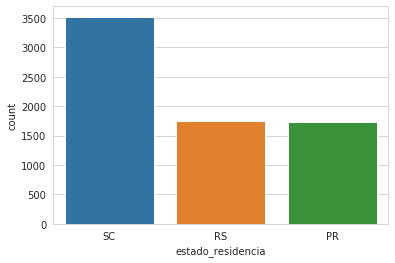

In [36]:
sns.countplot(x='estado_residencia', data=df);

In [7]:
df['estado_residencia'].value_counts()

SC    3519
RS    1750
PR    1731
Name: estado_residencia, dtype: int64

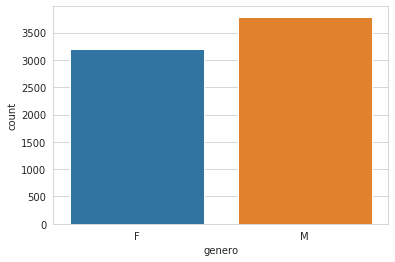

In [37]:
sns.countplot(x='genero', data=df);

In [8]:
df['genero'].value_counts()

M    3791
F    3209
Name: genero, dtype: int64

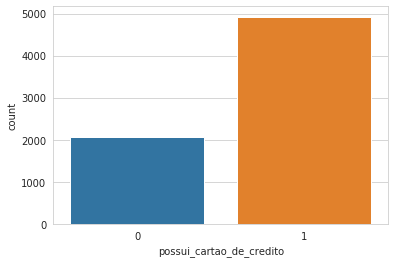

In [38]:
sns.countplot(x='possui_cartao_de_credito', data=df);

In [10]:
df['possui_cartao_de_credito'].value_counts()

1    4923
0    2077
Name: possui_cartao_de_credito, dtype: int64

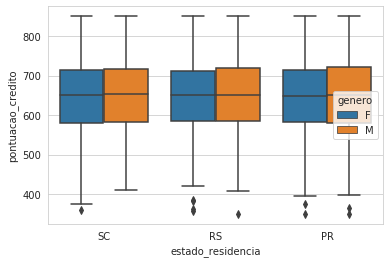

In [16]:
sns.boxplot(x='estado_residencia', y='pontuacao_credito', hue='genero', data=df)

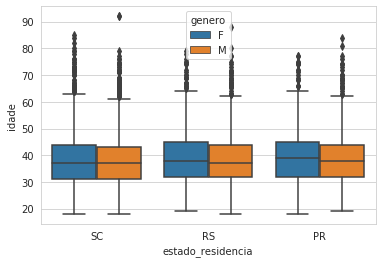

In [17]:
sns.boxplot(x='estado_residencia', y='idade', hue='genero', data=df)

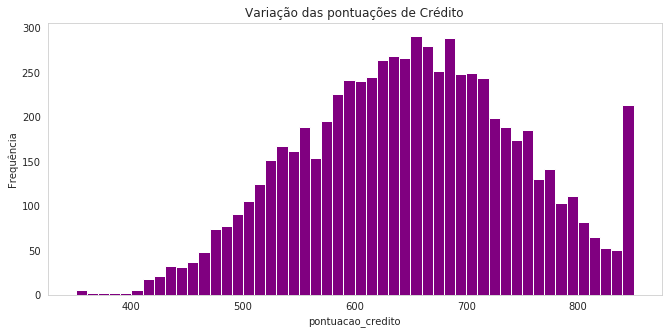

In [19]:
plt.figure(figsize=(11, 5))
plt.hist(df['pontuacao_credito'], bins=50, color = 'purple')
plt.grid()
plt.xlabel('pontuacao_credito')
plt.ylabel('Frequência')
plt.title('Variação das pontuações de Crédito')
plt.show()

- No gráfico acima, podemos identificar uma distribuição dos dados bem regular. Apenas a ultima barra que pode indicar outliers, visto que ela se apresenta bem anomala. 

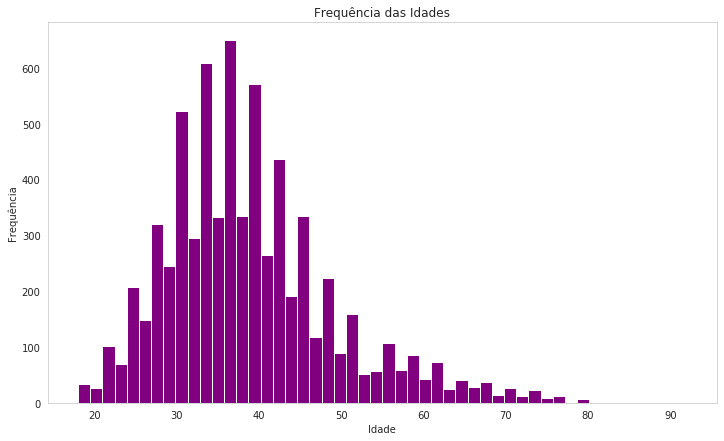

In [22]:
plt.figure(figsize=(12, 7))
plt.hist(df['idade'], bins=50, color = 'purple')
plt.grid()
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Frequência das Idades')
plt.show()

In [26]:
df['idade']
df.sort_values(by='idade', ascending=False).head(10)

,RowNumber,id,sobrenome,pontuacao_credito,estado_residencia,genero,idade,nivel_estabilidade,saldo_conta,numero_produtos,possui_cartao_de_credito,membro_ativo
6759,6760,f7bdf2b3451c6c97ff5a74872d5f364894092c25,8da4f37f4aef0aa4bb5a4443291dff3c89425cda,705,SC,M,92,1,126076.24,2,1,1
6443,6444,1467883b7dab1c6d851beb59ddadd97979f8ac9c,03dfa0e275b7b0d35ddd4ee1d90a1aa3dc16520b,753,SC,M,92,3,121513.31,1,0,1
2458,2459,00510f75b038dc89181d2735992bdeadfb838c2e,4cfc1f8594cdeb009db64988735c11a31a64b2a1,513,RS,M,88,10,0.00,2,1,1
3033,3034,95b5b764884af35cc6d591a66157ac318cc80ee1,30ca9938c79d4c94bc2d97e342af28437db103f5,787,SC,F,85,10,0.00,2,1,1
3531,3532,96cfcbaf1389dc00985f7db073be56939963a290,3171abfdb5f00e96815f038cb7e0162531e3796f,408,SC,F,84,8,87873.39,1,0,0
3387,3388,264329d033c068dbb84ca65f559ae902a6de8fa8,53af4e5de0821a79347fdbec8b2d6615fc509fbf,537,PR,M,84,8,92242.34,1,1,1
766,767,bcfcd943b7880f9703737adcb5a92fe00990f052,450d5f5a9f3e9bf16c2f9126e5edeab92e2c33a5,700,SC,F,82,2,0.00,2,0,1
4931,4932,905557bd256a79a5913589d3eca18eb3cc9fb87c,40fc87c0574b7baa7eecd7f7f12af2ad56909ebb,682,PR,M,81,6,122029.15,1,1,1
3994,3995,37c449b81921bd3484a1b9fcfa5c8f90952c0afc,d569bf3dc7d0a4351d56d39246b9f5b62f427ada,809,RS,M,80,8,0.00,2,0,1
310,311,1e8e1b4efcc58c54216f4758d0b83b3e8a3d1474,cad0aba52bda9f5e7241dc3b749f929574c12ce2,652,SC,F,80,4,0.00,2,1,1


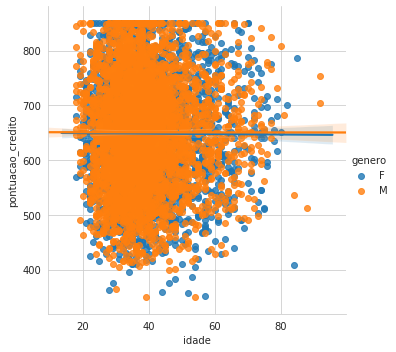

In [40]:
sns.lmplot(x='idade',y='pontuacao_credito',hue='genero' ,data=df);

- Neste gráfico não conseguimos identificar nenhuma tendência ou correlação entre Idade e Pontuação de Crédito. 

In [31]:
df.groupby(by=['estado_residencia','genero']).mean()['pontuacao_credito'].unstack()

genero,F,M
estado_residencia,,
PR,648.570208,649.312500
RS,649.738306,652.232534
SC,648.067542,650.761979


In [32]:
df.groupby(by=['estado_residencia','genero']).median()['pontuacao_credito'].unstack()

genero,F,M
estado_residencia,,
PR,648.0,651.0
RS,651.0,650.0
SC,651.0,654.0


In [33]:
df.groupby(by=['estado_residencia','genero']).std()['pontuacao_credito'].unstack()

genero,F,M
estado_residencia,,
PR,99.339793,97.997838
RS,95.077815,95.219881
SC,97.336477,97.156021


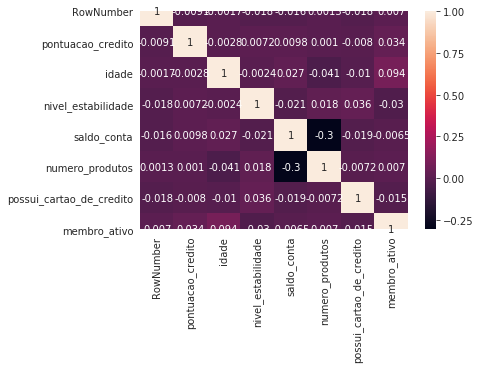

In [43]:
sns.heatmap(df.corr(), annot = True);

In [46]:
# Função para pegar os valores:
def get_stats(df):
    return {'moda': df.mode()[0], 'mediana': df.median(), 'media': df.mean(), 'desvio_padrao': df.std()}

In [47]:
# Agrupando a pontuação de cŕedito por Estado:
df_group = df['pontuacao_credito'].groupby(df['estado_residencia']).apply(get_stats).unstack()
df_group

,desvio_padrao,media,mediana,moda
estado_residencia,,,,
PR,98.607186,648.961294,650.0,850.0
RS,95.136598,651.105143,650.0,850.0
SC,97.233493,649.537653,653.0,850.0


In [48]:
# Criando o arquivo de resposta:
df_group.to_json('submission.json', orient='index')

A resposta deve conter os valores da média, mediana, moda e desvio padrão da pontuação de crédito para cada estado do dataset.